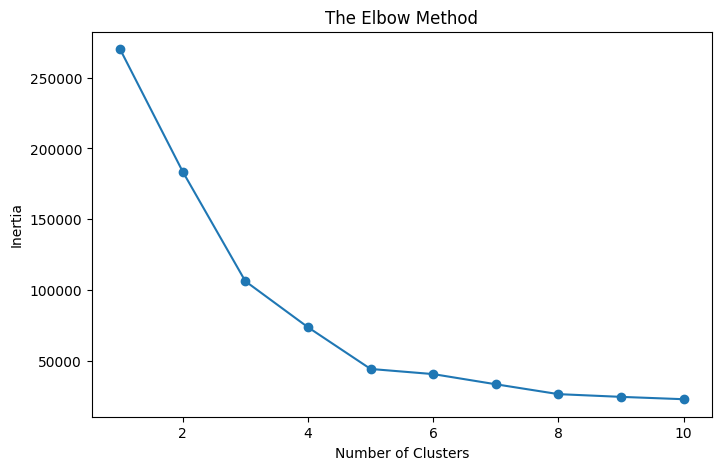

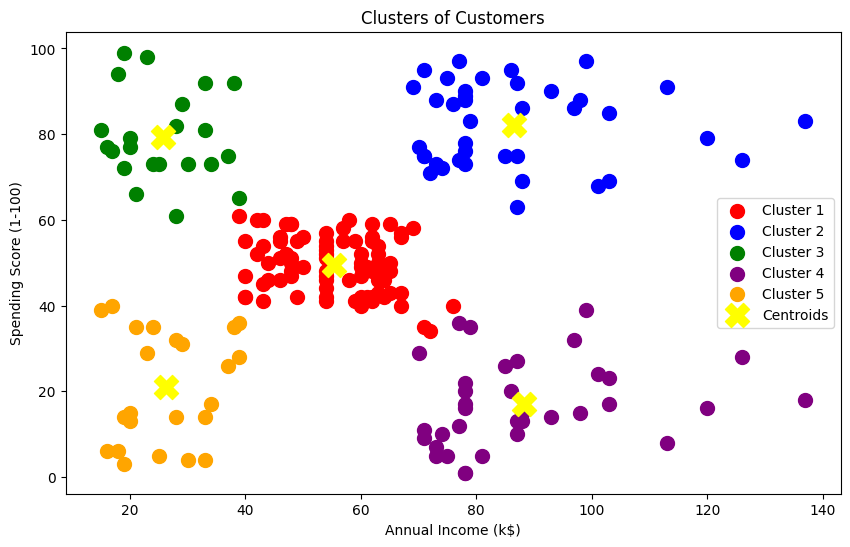

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 1: Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Step 2: Data preprocessing
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']
X = df[['AnnualIncome', 'SpendingScore']]

# Step 3: Elbow Method 
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 4: KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Step 5: Visualizing 
plt.figure(figsize=(10, 6))

plt.scatter(X.iloc[kmeans.labels_ == 0, 0], X.iloc[kmeans.labels_ == 0, 1], 
            s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[kmeans.labels_ == 1, 0], X.iloc[kmeans.labels_ == 1, 1], 
            s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[kmeans.labels_ == 2, 0], X.iloc[kmeans.labels_ == 2, 1], 
            s=100, c='green', label='Cluster 3')
plt.scatter(X.iloc[kmeans.labels_ == 3, 0], X.iloc[kmeans.labels_ == 3, 1], 
            s=100, c='purple', label='Cluster 4')
plt.scatter(X.iloc[kmeans.labels_ == 4, 0], X.iloc[kmeans.labels_ == 4, 1], 
            s=100, c='orange', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()
